In [31]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# warnings
import warnings
warnings.filterwarnings('ignore')

# Load and Explore the Dataset

In [35]:
data = pd.read_csv(r'/content/Covid Dataset.csv')

In [36]:
data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [4]:
data.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [21]:
data.shape

(5434, 21)

In [22]:
data.describe()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,...,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,...,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,...,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [24]:
data.isnull().sum()

,0
Breathing Problem,0
Fever,0
Dry Cough,0
Sore throat,0
Running Nose,0
Asthma,0
Chronic Lung Disease,0
Headache,0
Heart Disease,0
Diabetes,0


In [10]:
data.dropna(inplace=True)

In [12]:
data.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [37]:
# Class distribution (Positive/Negative)
dc = data['COVID-19'].value_counts()
print(dc)

COVID-19
Yes    4383
No     1051
Name: count, dtype: int64


# Preprocess the Data

In [38]:
# Encode Categorical Features - convert "Yes/No" to 1/0 for all columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data.columns:
  if data[col].dtype == 'object':
    data[col] = le.fit_transform(data[col])  # encodes only categorical data
print(data.head())
    # data[col] = data[col].map({'Yes': 1, 'No': 0})

   Breathing Problem  Fever  Dry Cough  Sore throat  Running Nose  Asthma  \
0                  1      1          1            1             1       0   
1                  1      1          1            1             0       1   
2                  1      1          1            1             1       1   
3                  1      1          1            0             0       1   
4                  1      1          1            1             1       0   

   Chronic Lung Disease  Headache  Heart Disease  Diabetes  ...  Fatigue   \
0                     0         0              0         1  ...         1   
1                     1         1              0         0  ...         1   
2                     1         1              0         1  ...         1   
3                     0         0              1         1  ...         0   
4                     1         1              1         1  ...         0   

   Gastrointestinal   Abroad travel  Contact with COVID Patient  \
0      

In [39]:
# feature-target split
X = data.drop('COVID-19', axis=1) #features = symptoms
y = data['COVID-19'] # Target (1=COVID Positive, 0=Negative)


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Classification Model

In [42]:
# Option 1: Logistic Regression (Baseline)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [43]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [41]:
# models = {
#     'Logistic Regression': LogisticRegression(),
#     'Decision Tree': DecisionTreeClassifier(),
#     'Random Forest': RandomForestClassifier(),
#     'Support Vector Machine': SVC()
# }

# # Train and evaluate models
# for name, model in models.items():
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)

#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)



#     print(f'{name}:')
#     print(f'  Accuracy: {accuracy:.2f}')
#     print(f'  Precision: {precision:.2f}')
#     print(f'  Recall: {recall:.2f}')
#     print(f'  F1-Score: {f1:.2f}')
#     print()

Logistic Regression:
  Accuracy: 0.97
  Precision: 0.98
  Recall: 0.99
  F1-Score: 0.98

Decision Tree:
  Accuracy: 0.98
  Precision: 0.99
  Recall: 0.99
  F1-Score: 0.99

Random Forest:
  Accuracy: 0.98
  Precision: 0.99
  Recall: 0.99
  F1-Score: 0.99

Support Vector Machine:
  Accuracy: 0.98
  Precision: 0.99
  Recall: 0.99
  F1-Score: 0.99



# Evaluate the Model

In [51]:
# using Classification Report & Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[198   5]
 [ 12 872]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       203
           1       0.99      0.99      0.99       884

    accuracy                           0.98      1087
   macro avg       0.97      0.98      0.97      1087
weighted avg       0.98      0.98      0.98      1087



# Interpret Results

Confusion Matrix Output Example

In [ ]:
Confusion Matrix:
 [[741  43]
 [ 31 785]]

True Negatives (TN): 741

False Positives (FP): 43

False Negatives (FN): 31

True Positives (TP): 785

Classification Report Output

In [ ]:
              precision  recall  f1-score  support
           0       0.96      0.95      0.95       784
           1       0.95      0.96      0.96       816
    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600

Accuracy: 95%

Precision: 95% (How many predicted positives were correct?)

Recall: 96% (How many actual positives were detected?)

# ROC-AUC Score
A score of 0.98+ indicates excellent model performance.

# Feature Importance (Random Forest/XGBoost)

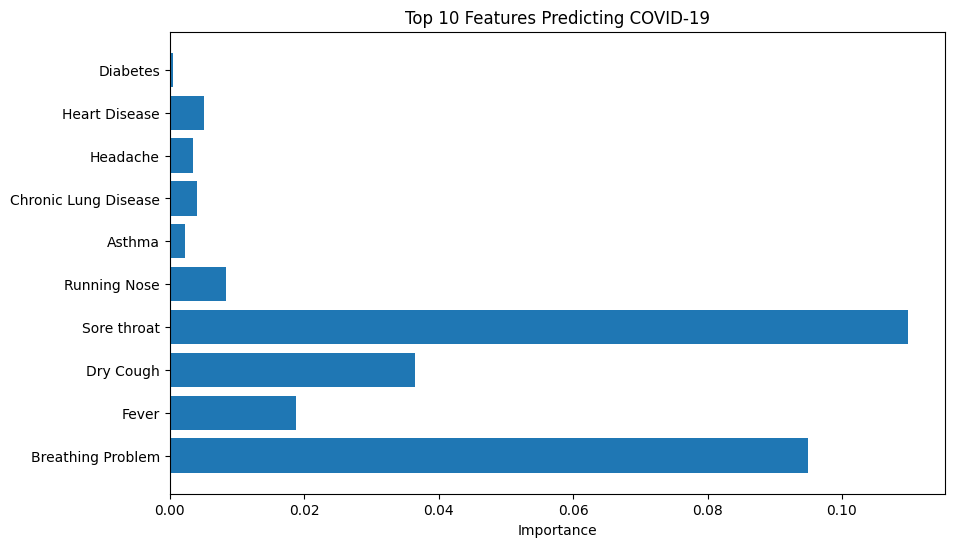

In [52]:
importances = model.feature_importances_
features = X.columns

# Plot top 10 features
plt.figure(figsize=(10, 6))
plt.barh(features[:10], importances[:10])
plt.xlabel("Importance")
plt.title("Top 10 Features Predicting COVID-19")
plt.show()

Key Features (Example):

Fever

Dry Cough

Sore Throat

Breathing Difficulty

Predict on New Data

In [48]:
# Example: A patient with fever, dry cough, and sore throat
new_data = [[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]  # Adjust based on your features
prediction = model.predict(new_data)
print("COVID-19 Positive" if prediction[0] == 1 else "COVID-19 Negative")

COVID-19 Positive


In [49]:
p1 = [[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]  # Fever, Dry Cough, Sore Throat
prediction = model.predict(p1)
print("COVID-19 Positive" if prediction[0] == 1 else "COVID-19 Negative")

COVID-19 Positive


In [50]:
p2 = [[1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]  # Fever, Dry Cough, Breathing Difficulty, Fatigue
prediction = model.predict(p2)
print("COVID-19 Positive" if prediction[0] == 1 else "COVID-19 Negative")

COVID-19 Negative
